***

# <div style=text-align:center><font color="orange">CNN</font>을 활용한 <font color="tomato">🕺성별 분류💃</font></div>
#### <div style=text-align:center> 2018122059 김내히 </div>

***

### 0. About the data

kaggle **Gender Classification from an image** dataset <br>
🔗 https://www.kaggle.com/gpiosenka/gender-classification-from-an-image?select=valid <br>
Train set: 1747 female facial images, 1744 male facial images <br>
Validation set: 100 female facial images, 100 male facial images <br>
Test set: 100 female facial images, 100 male facial images

### 1. Library Import

In [1]:
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense

### 2. Image Preview

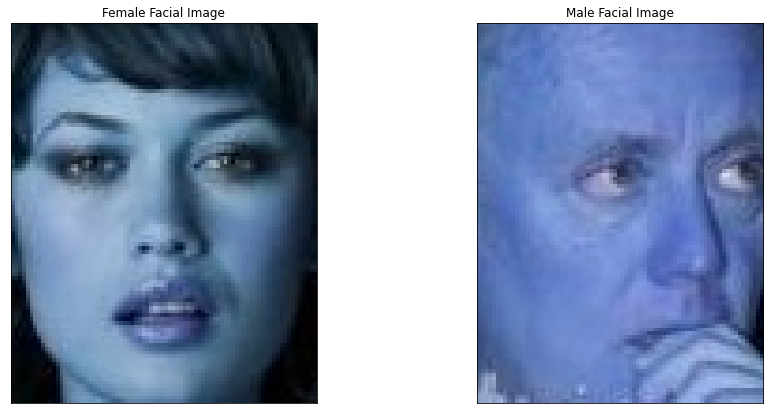

In [2]:
fpic='../train/female/0001.jpg'
mpic='../train/male/0001.jpg'
plt.figure(1, figsize = (15, 7))
plt.subplot(1, 2, 1)
plt.imshow(cv2.imread(fpic))
plt.title('Female Facial Image')
plt.xticks([]), plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(cv2.imread(mpic))
plt.title('Male Facial Image')
plt.xticks([]), plt.yticks([])

plt.show()

### 3. Dataset Generation

In [3]:
datagen = ImageDataGenerator(rescale=1/255,
                             rotation_range=10,
                             zoom_range=0.1,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             vertical_flip=True)    # randomly rotate, zoom, shift, flip image
testDatagen = ImageDataGenerator(rescale=1/255)

In [4]:
traindir = '/kaggle/input/gender-classification-from-an-image/train/'
valdir = '/kaggle/input/gender-classification-from-an-image/valid/'
testdir = '/kaggle/input/gender-classification-from-an-image/test/'

train_set = datagen.flow_from_directory(directory=traindir,
                                        target_size=(150,150),
                                        class_mode='binary',
                                        batch_size=32)
val_set = datagen.flow_from_directory(directory=valdir,
                                      target_size=(150,150),
                                      class_mode='binary',
                                      batch_size=32)
test_set = testDatagen.flow_from_directory(directory=testdir,
                                           target_size=(150,150),
                                           class_mode='binary',
                                           batch_size=32,
                                           shuffle=True)

Found 3491 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


### 4. Modeling

#### 1) Model 1

In [5]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [6]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 146, 146, 16)      1216      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 142, 142, 32)      12832     
_________________________________________________________________
flatten (Flatten)            (None, 645248)            0         
_________________________________________________________________
dense (Dense)                (None, 1)                 645249    
Total params: 659,297
Trainable params: 659,297
Non-trainable params: 0
_________________________________________________________________


In [7]:
history1 = model1.fit_generator(train_set,
                                validation_data=val_set,
                                epochs=30)

Epoch 1/30
110/110 [==============================] - 39s 317ms/step - loss: 1.1627 - accuracy: 0.5256 - val_loss: 0.6926 - val_accuracy: 0.4750
Epoch 2/30
110/110 [==============================] - 21s 188ms/step - loss: 0.6907 - accuracy: 0.5211 - val_loss: 0.6872 - val_accuracy: 0.5600
Epoch 3/30
110/110 [==============================] - 20s 184ms/step - loss: 0.6897 - accuracy: 0.5459 - val_loss: 0.6928 - val_accuracy: 0.5150
Epoch 4/30
110/110 [==============================] - 21s 187ms/step - loss: 0.6916 - accuracy: 0.5380 - val_loss: 0.6919 - val_accuracy: 0.5200
Epoch 5/30
110/110 [==============================] - 20s 184ms/step - loss: 0.6866 - accuracy: 0.5613 - val_loss: 0.6921 - val_accuracy: 0.5400
Epoch 6/30
110/110 [==============================] - 21s 186ms/step - loss: 0.6984 - accuracy: 0.5120 - val_loss: 0.6817 - val_accuracy: 0.5500
Epoch 7/30
110/110 [==============================] - 21s 188ms/step - loss: 0.7084 - accuracy: 0.5275 - val_loss: 0.6969 - val_ac

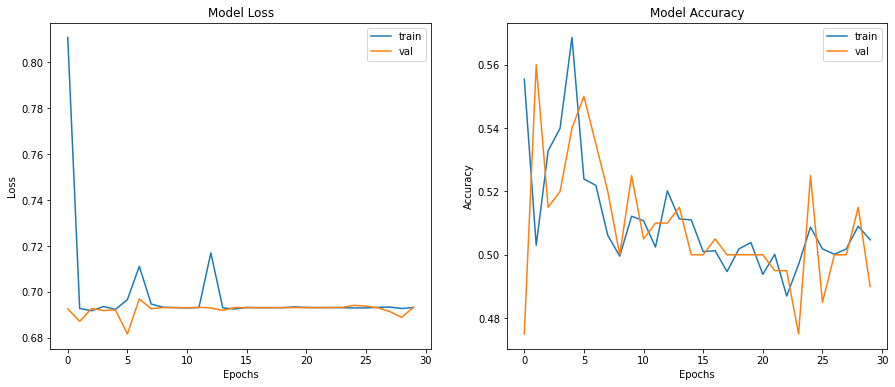

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].plot(history1.history['loss'])
ax[0].plot(history1.history['val_loss'])
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend(['train', 'val'])
ax[1].plot(history1.history['accuracy'])
ax[1].plot(history1.history['val_accuracy'])
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend(['train', 'val'])
plt.show()

In [9]:
pred1 = model1.predict_generator(test_set)
results1 = np.round(pred1)
results1[:10]    # first 10 predictions

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [10]:
loss1, acc1 = model1.evaluate(test_set)

7/7 [==============================] - 0s 49ms/step - loss: 0.6930 - accuracy: 0.5200


#### 2) Model 2

In [11]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((3, 3)),
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 146, 146, 16)      1216      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 44, 44, 32)        12832     
_________________________________________________________________
flatten_1 (Flatten)          (None, 61952)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 61953     
Total params: 76,001
Trainable params: 76,001
Non-trainable params: 0
_________________________________________________________________


In [13]:
history2 = model2.fit_generator(train_set,
                                validation_data=val_set,
                                epochs=30)

Epoch 1/30
110/110 [==============================] - 20s 173ms/step - loss: 0.6971 - accuracy: 0.5236 - val_loss: 0.6952 - val_accuracy: 0.5700
Epoch 2/30
110/110 [==============================] - 18s 166ms/step - loss: 0.6516 - accuracy: 0.6321 - val_loss: 0.6784 - val_accuracy: 0.5900
Epoch 3/30
110/110 [==============================] - 19s 173ms/step - loss: 0.6376 - accuracy: 0.6461 - val_loss: 0.6336 - val_accuracy: 0.6400
Epoch 4/30
110/110 [==============================] - 19s 173ms/step - loss: 0.6300 - accuracy: 0.6581 - val_loss: 0.5983 - val_accuracy: 0.6600
Epoch 6/30
110/110 [==============================] - 19s 169ms/step - loss: 0.6323 - accuracy: 0.6637 - val_loss: 0.6122 - val_accuracy: 0.6700
Epoch 7/30
110/110 [==============================] - 18s 167ms/step - loss: 0.6210 - accuracy: 0.6750 - val_loss: 0.6241 - val_accuracy: 0.6550
Epoch 8/30
110/110 [==============================] - 19s 172ms/step - loss: 0.6109 - accuracy: 0.6694 - val_loss: 0.5635 - val_ac

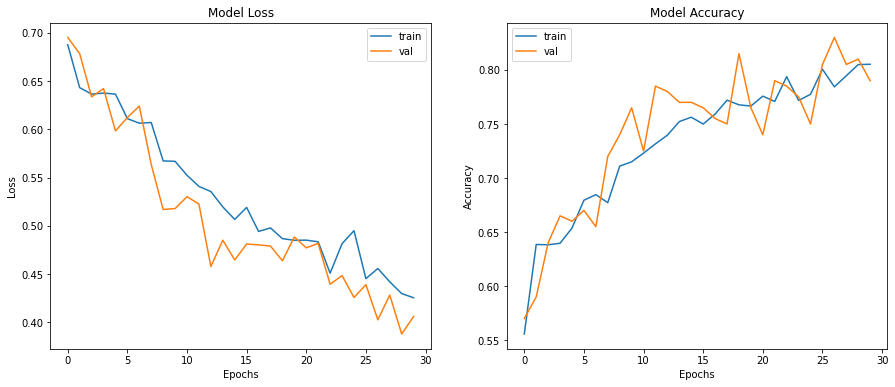

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].plot(history2.history['loss'])
ax[0].plot(history2.history['val_loss'])
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend(['train', 'val'])
ax[1].plot(history2.history['accuracy'])
ax[1].plot(history2.history['val_accuracy'])
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend(['train', 'val'])
plt.show()

In [15]:
pred2 = model2.predict_generator(test_set)
results2 = np.round(pred2)
results2[:10]    # first 10 predictions

array([[0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [16]:
loss2, acc2 = model2.evaluate(test_set)

7/7 [==============================] - 0s 32ms/step - loss: 0.3250 - accuracy: 0.8750


#### Model3

In [17]:
model3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (5, 5), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((3, 3)),
    tf.keras.layers.Conv2D(32, (5, 5), activation='relu'),
    tf.keras.layers.Conv2D(64, (5, 5), activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model3.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 146, 146, 16)      1216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 48, 48, 16)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 44, 44, 32)        12832     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 40, 40, 64)        51264     
_________________________________________________________________
dropout_2 (Dropout)          (None, 40, 40, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 102400)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [19]:
history3 = model3.fit_generator(train_set,
                                validation_data=val_set,
                                epochs=30)

Epoch 1/30
110/110 [==============================] - 32s 251ms/step - loss: 0.6885 - accuracy: 0.5520 - val_loss: 0.6341 - val_accuracy: 0.6250
Epoch 2/30
110/110 [==============================] - 20s 177ms/step - loss: 0.6559 - accuracy: 0.6053 - val_loss: 0.6248 - val_accuracy: 0.6600
Epoch 3/30
110/110 [==============================] - 20s 183ms/step - loss: 0.6454 - accuracy: 0.6406 - val_loss: 0.6431 - val_accuracy: 0.6700
Epoch 4/30
110/110 [==============================] - 21s 187ms/step - loss: 0.6392 - accuracy: 0.6377 - val_loss: 0.6342 - val_accuracy: 0.6800
Epoch 5/30
110/110 [==============================] - 20s 181ms/step - loss: 0.6334 - accuracy: 0.6456 - val_loss: 0.6124 - val_accuracy: 0.6800
Epoch 6/30
110/110 [==============================] - 20s 180ms/step - loss: 0.6271 - accuracy: 0.6514 - val_loss: 0.6138 - val_accuracy: 0.6250
Epoch 7/30
110/110 [==============================] - 19s 174ms/step - loss: 0.6335 - accuracy: 0.6511 - val_loss: 0.6011 - val_ac

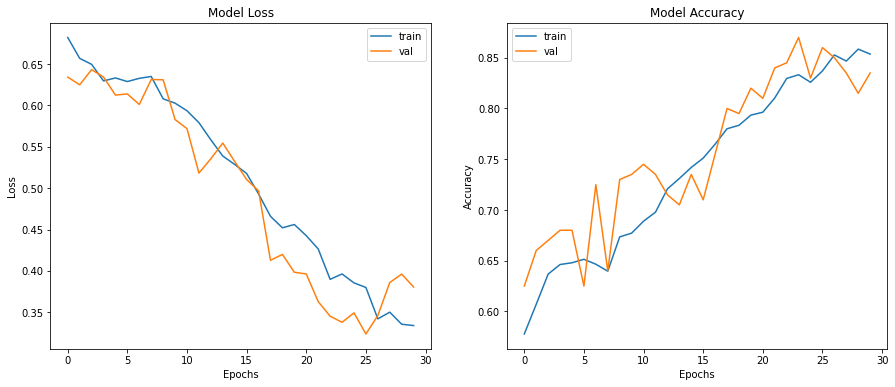

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].plot(history3.history['loss'])
ax[0].plot(history3.history['val_loss'])
ax[0].set_title('Model Loss')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend(['train', 'val'])
ax[1].plot(history3.history['accuracy'])
ax[1].plot(history3.history['val_accuracy'])
ax[1].set_title('Model Accuracy')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend(['train', 'val'])
plt.show()

In [21]:
pred3 = model3.predict_generator(test_set)
results3 = np.round(pred3)
results3[:10]    # first 10 predictions

array([[1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.]], dtype=float32)

In [22]:
loss3, acc3 = model3.evaluate(test_set)

7/7 [==============================] - 0s 42ms/step - loss: 0.2344 - accuracy: 0.9150


In [23]:
pd.DataFrame([loss, acc], index=["Loss", "Accuracy"], columns=["Model1", "Model2", "Model3"])

,Model1,Model2,Model3
Loss,0.693,0.325,0.2344
Accuracy,0.520,0.875,0.9150
